In [34]:
#!pip3 install statsmodels
#!pip3 install seaborn

In [35]:
import numpy as np
from numpy.random import uniform, normal, binomial, poisson
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Linear models make a few assumption about the propability distributiuon on the data, how their mean is linked to the a linear combination of independet variables. The main assumptions here for a linear regression models are
- the responce observations are independent of each other
- The data follows a normal distribution 
- The mean of the data is related to the independent variables through a linear function
- squared least is used to find the coefficient of these linear relations

### Generalized linear models are not limited to these assumbtions. The assumption here is a 'function' of the average of the data is in a linear relation with the independent variables
#### GMLs have 3 main components: 
- a link function
- a linear predictor
- a probability distribution

### Linear regression models, Poisson regression models, logidtic regression models are all cases of GLMs. 

## Linear regression model
\begin{align*}
\mu_{i} & = b_{0} + b_{1}x_{i} \\
y_{i} &\sim {\sf Norm}(\mu_{i}, \delta^2) \\
\end{align*}

- Here the link function is an identity function (no function is apllied on mu_{i})
- The probability distribution is Normal
- And we have a linear predictor b_{0} + b_{1}x_{i}

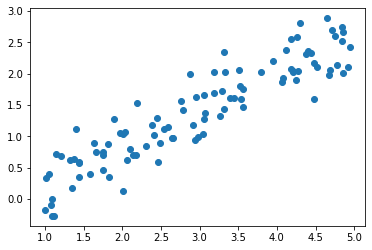

In [81]:
np.random.seed(5)
n_samples = 100
a = 0.6
b = -0.4
sd = 0.3

x = uniform(1,5, size = n_samples)
mu = a * x + b
y = normal(mu, sd)

plt.scatter(x, y)


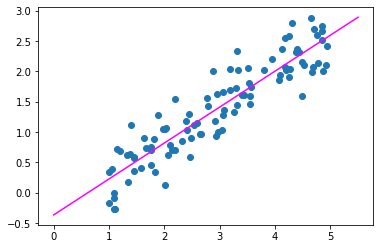

In [82]:
slop, intercept, r_value, p_value, std_err = stats.linregress(x,y)
xvals = np.array([0,5.5])
yvals = slop * xvals + intercept

plt.scatter(x, y)
plt.plot(xvals, yvals, color='magenta')

In [83]:
slop

0.5919235534673726

In [84]:
p_value

5.229272139985917e-41

### Using GLM to to linear regression

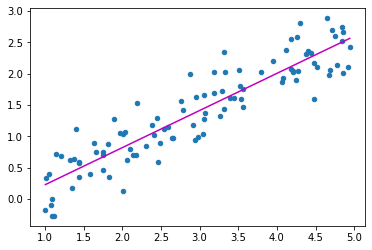

In [89]:
lm_exog, lm_endog = sm.add_constant(x), y
lm = sm.GLM(lm_endog, lm_exog, family=sm.families.Gaussian()) # assuming the link for gausian by default is identty # https://www.statmethods.net/advstats/glm.html
linear_model = lm.fit()
lm_preds = linear_model.predict(lm_exog)

lm_idx = x.argsort()
plt.plot(x[lm_idx], lm_preds[lm_idx], color='m')
plt.scatter(x,y, s=20)

## Poisson

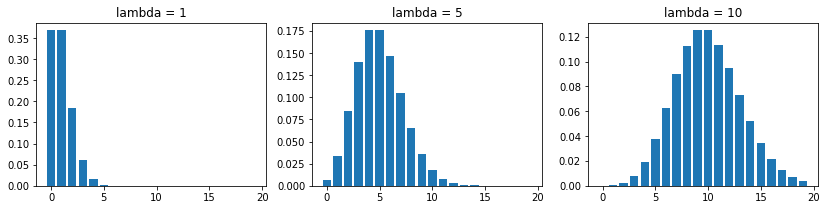

In [90]:
fig, axs = plt.subplots(1, 3, figsize=(14, 3))

x_poisson = np.arange(20)
lambdas = [1, 5, 10]

for index, lam in enumerate(lambdas):
    y_poission = stats.poisson.pmf(x_poisson, lam)
    axs[index].bar(x_poisson, y_poission)
    axs[index].set_title(f'lambda = {lam}')

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -206.39
Date:                Fri, 24 Dec 2021   Deviance:                       105.73
Time:                        01:25:52   Pearson chi2:                     98.1
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9089
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3889      0.164     -2.372      0.018      -0.710      -0.068
x1             0.6017      0.042     14.365      0.000       0.520       0.684
==============================================================================
"""

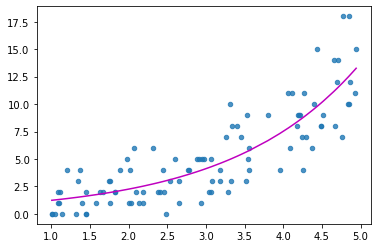

In [91]:
lamb = np.exp(a * x + b)
y_poiss = poisson(lamb)

exog, endog = sm.add_constant(x), y_poiss

mod = sm.GLM(endog,exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

idx = x.argsort()
y_pred = res.predict(exog)
plt.plot(x[idx], y_pred[idx], color='m')
plt.scatter(x, y_poiss, s=20, alpha=0.8)

## Logistic regression

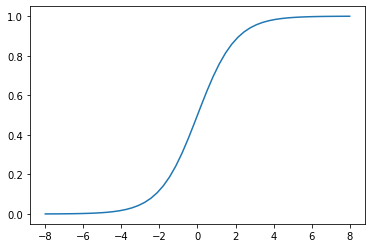

In [98]:
def logit(x):
    return 1 / (1 + np.exp(-x))

x_logit = np.linspace(-8, 8) # by default it returns 50 lements with equal intervals between the given range
y_logit = logit(x_logit)
plt.plot(x_logit, y_logit)

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -31.508
Date:                Fri, 24 Dec 2021   Deviance:                       63.016
Time:                        01:52:55   Pearson chi2:                     109.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.5303
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.0444      1.385     -5.087      0.000      -9.758      -4.330
x1             2.4211      0.465      5.207      0.000       1.510       3.332
==============================================================================
"""

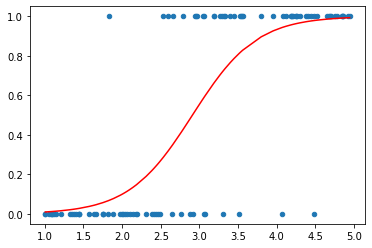

In [110]:
np.random.seed(5)
n_sample = 100
a = 3.0
b = -9.0

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

idx = x.argsort()
z = a * x + b
q = logit(z)
y_lgt = binomial(n=1, p=q)

lgt_exog, lgt_endog = sm.add_constant(x), y_lgt
lgt_model = sm.GLM(lgt_endog, lgt_exog, family=sm.families.Binomial(link=sm.families.links.logit()))
lgt_model_res = lgt_model.fit()
display(lgt_model_res.summary())

lgt_preds = lgt_model_res.predict(lgt_exog)

plt.plot(x[idx], lgt_preds[idx], color='r')
plt.scatter(x, y_lgt, s=20)

## Custom GLM

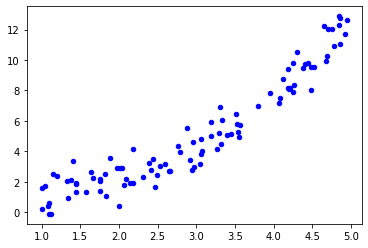

In [116]:
np.random.seed(5)
n_sample = 100
a = 0.6
b = -0.4
sd = 0.8

x = uniform(1, 5, size=n_samples)
mu = np.exp(a *x + b)
y = normal(mu, sd)

plt.scatter(x, y, color='b', s=20)
## we can see that the relation betwwen the mean and the data is not linear but the sd is constant with respect to x

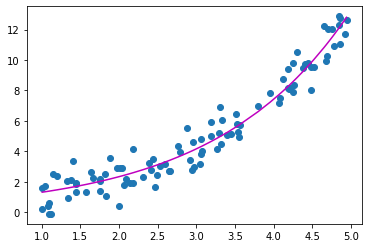

In [120]:
cus_exog, cus_endog = sm.add_constant(x) , y
cus_lm = sm.GLM(cus_endog, cus_exog, family=sm.families.Gaussian(link=sm.families.links.log())) # the link is log but the probability function is normal
cus_model_res = cus_lm.fit()

cus_preds = cus_model_res.predict(cus_exog)
idx = x.argsort()

plt.plot(x[idx], cus_preds[idx], color='m')
plt.scatter(x, y)

## Deduplication in pandas

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame({
                    'brand':['yum yum', 'yum yum', 'indomie', 'indomie', 'indomie'],
                    'style': ['cup', 'cup', 'cup', 'pack', 'pack'], 
                    'rating':[4, 4, 3.5, 15, 5]})

In [3]:
df

,brand,style,rating
0,yum yum,cup,4.0
1,yum yum,cup,4.0
2,indomie,cup,3.5
3,indomie,pack,15.0
4,indomie,pack,5.0


In [4]:
df.drop_duplicates(subset='brand')

,brand,style,rating
0,yum yum,cup,4.0
2,indomie,cup,3.5


In [6]:
df.drop_duplicates(subset=['brand', 'style'])

,brand,style,rating
0,yum yum,cup,4.0
2,indomie,cup,3.5
3,indomie,pack,15.0


In [7]:
df.drop_duplicates(subset=['brand', 'style'], keep='last')

,brand,style,rating
1,yum yum,cup,4.0
2,indomie,cup,3.5
4,indomie,pack,5.0


# Deduplication in SQL

In [ ]:
CREATE TABLE Employee
	(ID INT AUTO_INCREMENT PRIMARY KEY,
    FirstName varchar(100),
    LastName varchar(100),
    Country varchar(100)
    )
    


INSERT INTO Employee(FirstName, LastName, Country) 
			values
            ('raj', 'Gupta', 'India'),
            ('Raj','Gupta','India'),
			('Mohan','Kumar','USA'),
			('James','Barry','UK'),
			('James','Barry','UK'),
			('James','Barry','UK')
# remove deduplicate
SELECT FirstName, LastName, Country, count(*) as cnt
from Employee
GROUP BY FirstName, LastName, Country HAVING count(*) > 1